# User Availability

In [1]:
import pandas as pd

# load data
Questions2012 = pd.read_csv('../../160-Stackoverflow-Data/train_test/X_train.csv' ,\
                    dtype = {'LastEditorDisplayName': str, 'Tags': str})
Answers2012 = pd.read_csv('../../160-Stackoverflow-Data/train_test/Answers.csv' ,\
                    dtype = {'LastEditorDisplayName': str, 'Tags': str})
Users = pd.read_csv('../../160-Stackoverflow-Data/train_test/User.csv')

# data preprocessing
Questions2012['CreationDate'] = pd.to_datetime(Questions2012['CreationDate'], format="%Y-%m-%dT%H:%M:%S")
Answers2012['CreationDate'] = pd.to_datetime(Answers2012['CreationDate'], format="%Y-%m-%dT%H:%M:%S")
Users['CreationDate'] = pd.to_datetime(Users['CreationDate'], format="%Y-%m-%dT%H:%M:%S")


def user_avail(user_id):
    """
    :param user_id: int - userId
    :return: pd.Series - frequency of user activities
    """
    user_questions = Questions2012.loc[(Questions2012.OwnerUserId == user_id),['CreationDate']]
    user_answers = Answers2012.loc[Answers2012.OwnerUserId == user_id, ['CreationDate']]
    user_activities = user_questions.append(user_answers)
    return user_activities['CreationDate'].dt.hour.value_counts()

[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Hour of the Day'),
 Text(0.5,1,'Active Hours for User 23')]

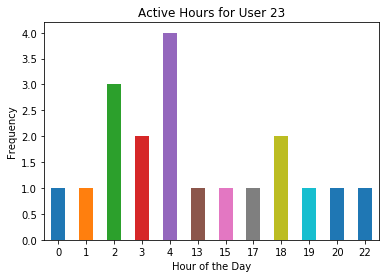

In [6]:
# example
user23_avail = user_avail(3434)
ax = user23_avail.sort_index().plot.bar()
ax.set_xticklabels(labels=user23_avail.sort_index().index, rotation=0, fontsize=10)
ax.set(xlabel='Hour of the Day', ylabel='Frequency', 
        title='Active Hours for User 23')